In [1]:
from __future__ import print_function

from glob import glob
import os

from fuel.streams import DataStream
from fuel.schemes import ShuffledScheme
from fuel.datasets.hdf5 import H5PYDataset
import h5py
import pandas as pd
import numpy as np
from scipy.misc import imread

img_dim = 256

cmds_rec1 = pd.read_csv('data/ergo-rec-1/data-0-cmds.csv',
            names=['command', 'action_1', 'action_2', 'action_3',
                  'action_4', 'action_5', 'action_6'])
pos_rec1 = pd.read_csv('data/ergo-rec-1/data-0-pos.csv',
            names=['pos_1', 'pos_2', 'pos_3', 'pos_4', 'pos_5', 'pos_6'])
vel_rec1 = pd.read_csv('data/ergo-rec-1/data-0-vel.csv',
            names=['vel_{}'.format(i) for i in range(36)])

cmds_rec2 = pd.read_csv('data/ergo-rec-2/data-0-cmds.csv',
            names=['command', 'action_1', 'action_2', 'action_3',
                  'action_4', 'action_5', 'action_6'])
pos_rec2 = pd.read_csv('data/ergo-rec-2/data-0-pos.csv',
            names=['pos_1', 'pos_2', 'pos_3', 'pos_4', 'pos_5', 'pos_6'])
vel_rec2 = pd.read_csv('data/ergo-rec-2/data-0-vel.csv',
            names=['vel_{}'.format(i) for i in range(36)])

assert (cmds_rec1 == cmds_rec2).all().all()

func = lambda x: int(x.split('-')[-1].split('.')[0])
rec1_imgs = glob('data/ergo-rec-1/*.jpg')
rec1_imgs = sorted(rec1_imgs, key=func)

rec2_imgs = glob('data/ergo-rec-2/*.jpg')
rec2_imgs = sorted(rec2_imgs, key=func)

time = 60
size = len(rec1_imgs) / time

f = h5py.File('/u/alitaiga/repositories/sim-to-real/robot_data.h5', mode='w')
# f = h5py.File('/data/lisatmp3/alitaiga/sim-to-real/robot_data.h5', mode='w')
image_source = f.create_dataset('image_source', (size, time, 3, img_dim, img_dim), dtype='float32')
image_target = f.create_dataset('image_target', (size, time, 3, img_dim, img_dim), dtype='float32')
actions = f.create_dataset('actions', (size, time, 7), dtype='float32')
state = f.create_dataset('states', (size, time, 42), dtype='float32')

split_dict = {
    'train': {
        'image_source': (0, size),
        'image_target': (0, size),
        'actions': (0, size),
        'states': (0, size),
    },
}
f.attrs['split'] = H5PYDataset.create_split_array(split_dict)

flush = 40

# rm /u/alitaiga/repositories/sim-to-real/robot_data.h5

In [2]:
# rm /u/alitaiga/repositories/sim-to-real/robot_data.h5

In [3]:
l1, l2, acts, states = [], [], [], []
count = 0
i = 0

for img1, img2 in zip(rec1_imgs, rec2_imgs):
    assert func(img1) == func(img2)
    im1, im2 = imread(img1), imread(img2)
    ind = func(img1)
    l1.append(im1.reshape(1,3,img_dim,img_dim))
    l2.append(im2.reshape(1,3,img_dim,img_dim))
    acts.append(cmds_rec1.iloc[ind].values)
    states.append(np.concatenate([
        pos_rec1.iloc[0].values, vel_rec1.iloc[0].values
    ], axis=0))
    i += 1
    
    if len(l1) == time:
        array1 = np.concatenate(l1, axis=0)
        array2 = np.concatenate(l2, axis=0)
        array_acts = np.vstack(cmds)
        array_states = np.vstack(states)
        
        image_source[count, :, :, :, :] = array1
        image_target[count, :, :, :, :] = array2
        state[count, :, :] = array_states
        actions[count, :, :] = array_acts
        l1, l2, acts, states = [], [], [], []
        count += 1 
        
    if count % flush == 0 and count != 0:
        f.flush()
f.flush()

NameError: name 'cmds' is not defined

In [ ]:
batch = 8

robot_data = H5PYDataset(
    '/u/alitaiga/repositories/sim-to-real/robot_data.h5',
    which_sets=('train',)
)
stream = DataStream(
    robot_data,
    iteration_scheme=ShuffledScheme(robot_data.num_examples, batch)
)

In [ ]:
iter_ = stream.get_epoch_iterator()

In [6]:
rec1_imgs[0]

'data/ergo-rec-1/outfile-0-0.jpg'

In [ ]:
print([x.shape for x in l])

In [4]:
from scipy.misc import toimage

In [9]:
from PIL import Image

image = Image.open('data/ergo-rec-1/outfile-0-0.jpg')
image.show()

In [15]:
array.shape

(256, 256, 3)

In [14]:
array = np.asarray(image)

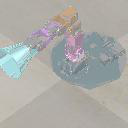

In [25]:
Image.fromarray(array[64:192,64:192,:])

In [18]:
array[64:128,64:128,:].shape

(64, 64, 3)

In [19]:
array.shape

(256, 256, 3)

In [20]:
256-64

192

In [21]:
256-128

128

In [22]:
128/2

64

In [24]:
256-64

192